In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file

In [109]:

file = pd.read_csv('annotated_points_np_200.csv')
X = file[['x', 'y']].values
y = file['labels'].values

# Map class labels to 1 and -1
y[y == 6] = 1
y[y == 7] = -1

# Implement the perceptron learning algorithm:

In [110]:
def perceptron(X, y, w_init):
    w = w_init
    misclassified = True
    while misclassified:
        misclassified = False
        for i in range(len(X)):
            if y[i] * np.dot(w, X[i]) <= 0:
                w = w + y[i] * X[i]
                misclassified = True
    return w

# Initialization 1: Randomly
w_random = np.random.rand(3)

# Initialization 2: With the help from your dataset
w_dataset = np.mean(X, axis=0)

# Initialization 3: With zeros
w_zeros = np.zeros(3)

# Apply perceptron algorithm with different initializations
w_random = perceptron(np.c_[X, np.ones(len(X))], y, w_random)
w_dataset = perceptron(np.c_[X, np.ones(len(X))], y, np.append(w_dataset, 0))
w_zeros = perceptron(np.c_[X, np.ones(len(X))], y, w_zeros)


#  Plot the results with the data points:

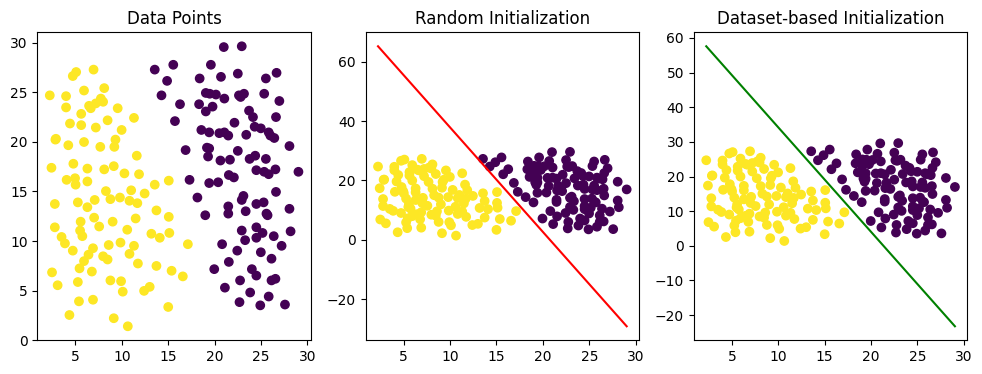

In [111]:

plt.figure(figsize=(12, 4))

# Plot data points
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Data Points')

# Plot linear separator for random initialization
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y)
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_values = (-w_random[2] - w_random[0] * x_values) / w_random[1]
plt.plot(x_values, y_values, color='r')
plt.title('Random Initialization')

# Plot linear separator for dataset-based initialization
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y)
y_values = (-w_dataset[2] - w_dataset[0] * x_values) / w_dataset[1]
plt.plot(x_values, y_values, color='g')
plt.title('Dataset-based Initialization')

plt.show()